# Medical Project
### Lars Olsen and Oda Kristensen

We start by inporting some packages and modules:

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, make_scorer
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np
from scipy.stats import norm
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline

We read the files:

In [12]:
features = pd.read_csv('historical_X.dat', header=None, sep=" ").values
actions = pd.read_csv('historical_A.dat', header=None, sep=" ").values
outcome = pd.read_csv('historical_Y.dat', header=None, sep=" ").values

In this part of the project we are only interested in the features. The first 128 features are what we obsere; sex, smoker and 126 genes. The 2 last attributes are the symptoms and these can be taken to be akin to labels in supervised learning.

In [13]:
observations = features[:, :128]
labels = features[:,128] + features[:,129]*2

We take a look at the observations of the 1st pacient, sex = 0, and non smoker.

In [14]:
observations[0]

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0], dtype=int64)

We divide our data set into a traing set and a test set.

In [15]:
obs_train, obs_test, lab_train, lab_test = train_test_split(observations, labels, test_size=0.25)

Let's look at the distribution of symptoms:

(array([3607.,    0.,    0., 3157.,    0.,    0.,  422.,    0.,    0.,
         314.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

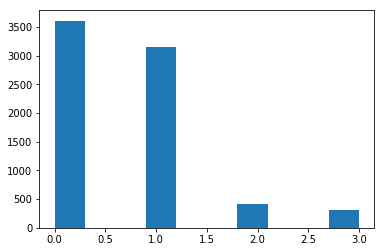

In [16]:
plt.hist(lab_train)

We now take a look at the histogram of observation. 

([array([3730.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         3770.]),
  array([5444.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         2056.]),
  array([3725.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         3775.]),
  array([3707.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         3793.]),
  array([3739.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         3761.]),
  array([3807.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         3693.]),
  array([3756.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         3744.]),
  array([3753.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         3747.]),
  array([3811.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         3689.]),
  array([3867.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         3633.]),
  array([3700.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         3800.]),
  array([3

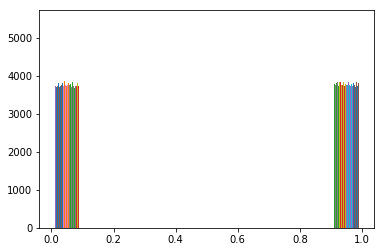

In [63]:
plt.hist(obs_train)

We talked to Summaya Mumtaz in the lab and she said that from this plot we could se that there are two clusters. I'm not sure how she did that. For me it just seems that each attribute takes either the value of zero or one, as we know they do from the definition of the data. If we look at only one attribute at the time I agreee that we have two clusters. Take $x_2$, either they smoke ($x_2=1$) or not ($x_2=0$), so we have to clusters. But when we have more dimensions I feel like we have more clusters. Say we look at the two first attributes. Then a person can be either male or female and the can smoke or not smoke, i.e. we have four potential combinations. Think of a square with a cluster in each corner. obviously it can be that there are no female smokers. Then we have three clusters. Then we can think of the clusters as being on a line. Male smokers are more similar to male non-smokers than female non-smokers, and male non-smokers are equally similar to both (assuming equal weighting of the attributes). So we have "male smokers" -- "male non-smokers" -- "female non-smokers". In a hypercube we would still have clusters in each corner, and this gives us $2^{128}$ potential clusters. This is an astronomical number. So we must assume that there is pattern in the data, which will lower this number. 

From the two histograms bellow we see that there are more people of the sex zero and more non-smokers.

C:\Users\lars9\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


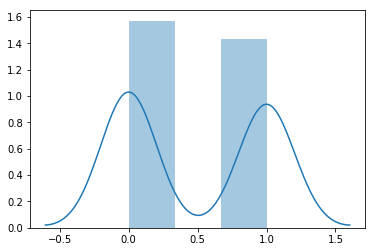

In [74]:
sns.distplot(obs_train[0])

C:\Users\lars9\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


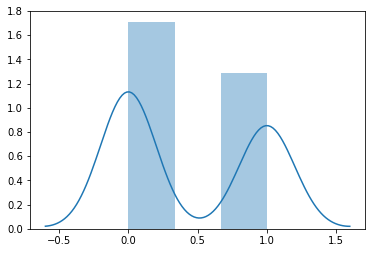

In [75]:
sns.distplot(obs_train[1])

Let's look at the proportions of smokers among sex 0. 

C:\Users\lars9\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


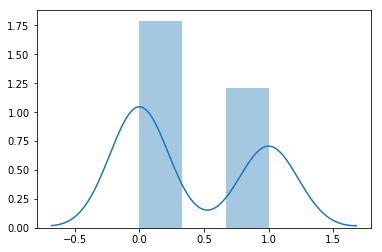

In [76]:
sns.distplot(obs_train[1][obs_train[0] == 0])

Let's look at the proportions of smokers among sex 1.

C:\Users\lars9\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


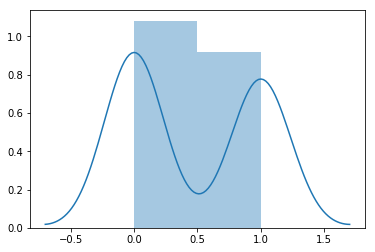

In [77]:
sns.distplot(obs_train[1][obs_train[0] == 1])

We see that there is a higher percentage of sex0 that smoke than sex=1 that smoke.

### Let's now take a look at the scores with Kmeans

In [87]:
for k in range(1,21):
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(obs_train)
    
    # Sum of distances of samples to their closest cluster center.
    interia = kmeans_model.inertia_
    
    print("k = %2d: Interia = %f   Score = %f" % (k,interia,kmeans_model.score(obs_test)))

k =  1: Interia = 239527.175867   Score = -79867.046178
k =  2: Interia = 217785.109431   Score = -72587.124245
k =  3: Interia = 205810.968713   Score = -69004.129817
k =  4: Interia = 197775.670797   Score = -66427.130312
k =  5: Interia = 191490.696269   Score = -64234.429293
k =  6: Interia = 186203.590870   Score = -62579.128115
k =  7: Interia = 181705.492180   Score = -61365.462732
k =  8: Interia = 177867.537575   Score = -59993.862174
k =  9: Interia = 174760.813324   Score = -58968.016495
k = 10: Interia = 172185.361453   Score = -58133.681071
k = 11: Interia = 169901.193303   Score = -57415.018827
k = 12: Interia = 167536.161366   Score = -56593.773510
k = 13: Interia = 165516.208564   Score = -56226.541018
k = 14: Interia = 163478.595563   Score = -55275.864286
k = 15: Interia = 161960.894601   Score = -54828.768875
k = 16: Interia = 160354.615341   Score = -54271.323679
k = 17: Interia = 158788.709470   Score = -53830.386808
k = 18: Interia = 157436.782593   Score = -53340

We want this score as high as possible. The k with the best score is the k we should chose, i.e. the optimal number of clusters. The problem is that this score will keep incresing to zero when k increase. This is because score look at the distance from each point to the closest clustersentrum (for the test data, Ineteria does the same for the training data), and train and test set takes the same possible values this is a problem. Since then $2^{128}$ will (potentially) be the best k. Usually this score starts to level of, that the increase in absolutt value decrese. So one can usually pick a resoanble K, but I'm unsure where such a cap should be choosen here. Interia is much bigger due to the bigger dataset. One need to look at -score.

Say that K = 6 is a nice treeshold. We take a closer look at K = 6.

In [106]:
kmeans_model = KMeans(n_clusters=6, random_state=1).fit(obs_train)

In [107]:
kmeans_model.score(obs_test)

-62579.12811542232

In [109]:
for l in range(6):
    print("Number of people in cluster %d: %d" %(l,sum(kmeans_model.labels_ == l)))

Number of people in cluster 0: 1151
Number of people in cluster 1: 1160
Number of people in cluster 2: 1372
Number of people in cluster 3: 1205
Number of people in cluster 4: 1371
Number of people in cluster 5: 1241


We see that the people are fairly divided between the clusters.

In [112]:
for k in range(1,21):
    gm_model = GaussianMixture(n_components=k, max_iter = 200, random_state=1).fit(obs_train)
    
    print("k = %2d: Score = %f" % (k, gm_model.score(obs_test)))

k =  1: Score = -32.528769
k =  2: Score = -27.123753
k =  3: Score = -22.220430
k =  4: Score = -23.297281
k =  5: Score = -17.229804
k =  6: Score = -14.923381
k =  7: Score = -20.564504
k =  8: Score = -17.904785
k =  9: Score = -18.624738
k = 10: Score = -17.106423
k = 11: Score = -16.510621
k = 12: Score = -17.836538
k = 13: Score = -13.936416
k = 14: Score = -16.991099
k = 15: Score = -19.314016
k = 16: Score = -20.153840
k = 17: Score = -20.773279
k = 18: Score = -21.576615
k = 19: Score = -24.029008
k = 20: Score = -26.889810


We now do the same as before but also take a look at the Bic score to find the optimal value. We have done this because of. http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html#sphx-glr-auto-examples-mixture-plot-gmm-selection-py It was wrong of us to look at BicTest. One should only look at BicTrain. The optimal value is 3. But, 2 is not far of. And since we know that is the truth we go for it.

In [17]:
for k in range(1,10):
    gm_model = GaussianMixture(n_components=k, max_iter = 200, random_state=1).fit(obs_train)
    bic = gm_model.bic(obs_train)
    aic = gm_model.aic(obs_train)
    print("k = %2d: ScoreTrain = %.3f   ScoreTest = %.3f   Bic = %.3f   Aic = %.3f" % (k, gm_model.score(obs_train),gm_model.score(obs_test), bic, aic))

k =  1: ScoreTrain = -31.373   ScoreTest = -32.359   Bic = 545399.189   Aic = 487359.622
k =  2: ScoreTrain = -24.810   ScoreTest = -26.926   Bic = 521777.915   Aic = 405691.858
k =  3: ScoreTrain = -20.511   ScoreTest = -24.019   Bic = 532103.217   Aic = 357970.670
k =  4: ScoreTrain = -17.173   ScoreTest = -22.056   Bic = 556844.621   Aic = 324665.584
k =  5: ScoreTrain = -13.436   ScoreTest = -19.714   Bic = 575616.057   Aic = 285390.530
k =  6: ScoreTrain = -12.238   ScoreTest = -20.020   Bic = 632465.142   Aic = 284193.125
k =  7: ScoreTrain = -9.678   ScoreTest = -218.665   Bic = 668870.530   Aic = 262552.023
k =  8: ScoreTrain = -7.701   ScoreTest = -217.959   Bic = 714044.179   Aic = 249679.183
k =  9: ScoreTrain = -1.213   ScoreTest = -12.901   Bic = 691539.330   Aic = 169127.844


From the values above we see that k=13 is the best choice, but k=6 is not that far off, and since 6 is much lower we conclude that with Gaussian Mixture models the 'optimal' choice is 6 clusters. If we look at the score. But AIC and BIC is betther. Here we see that 2 or 3 is optimal.

In [19]:
gm_model = GaussianMixture(n_components=2, max_iter = 200, random_state=1).fit(obs_train)

In [ ]:
gm_model.predict(obs_)


#### We look at kmeans_silhouette_analysis

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster. http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

In [122]:
for n_clusters in range(2,11):
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(obs_train)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(obs_train, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.08789046555225062
For n_clusters = 3 The average silhouette_score is : 0.07400565765849043
For n_clusters = 4 The average silhouette_score is : 0.06795148893837454
For n_clusters = 5 The average silhouette_score is : 0.06463853037241843
For n_clusters = 6 The average silhouette_score is : 0.06346335792308268
For n_clusters = 7 The average silhouette_score is : 0.06442224067814628
For n_clusters = 8 The average silhouette_score is : 0.06535853448402974
For n_clusters = 9 The average silhouette_score is : 0.06588064103198324
For n_clusters = 10 The average silhouette_score is : 0.06493274114857885


We see that the score stabilize after 4 clusters.

# Final choice of clusters and features
In the R file OptimalKAndFeatureImportance.R we have calculated the best choice of K and the most important features, based on SilhouetteScore and the importance score from randomforest, respectively. From now on we use the values obtained there. We got that 2 is the optimal number of clusters and $x_{6}$, $x_4$, $x_{114}$, $x_{12}$, $x_{84}$, $x_2$ and $x_{56}$ are the most important feautres, in that order. Recall that python counts from 0, so this means columns 5, 3, 113, 11, 83, 1 and 55. 

Start by dividing the people into 2 clusters.

In [24]:
kmeans_model = KMeans(n_clusters=2, random_state=1).fit(obs_train)

In [26]:
kmeans_model.labels_

array([0, 0, 1, ..., 1, 0, 0])

In [36]:
train_obs_0 = obs_train[kmeans_model.labels_ == 0]
train_obs_1 = obs_train[kmeans_model.labels_ == 1]
train_lab_0 = lab_train[kmeans_model.labels_ == 0]
train_lab_1 = lab_train[kmeans_model.labels_ == 1]

In [32]:
train_obs_0.shape

(3609, 128)

In [40]:
train_lab_0.shape

(3609,)

We now plot the histogram and see that there are more people with symptoms 1 and 3 in the 0 cluster. 
And there are more people with symptoms 0 and 2 in cluster 1.

(array([1269.,    0.,    0., 2071.,    0.,    0.,   95.,    0.,    0.,
         174.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

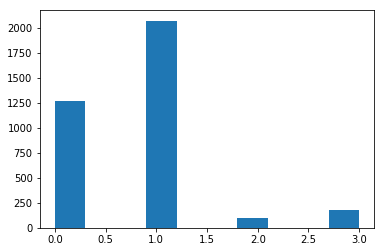

In [38]:
plt.hist(train_lab_0)

(array([2338.,    0.,    0., 1086.,    0.,    0.,  327.,    0.,    0.,
         140.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

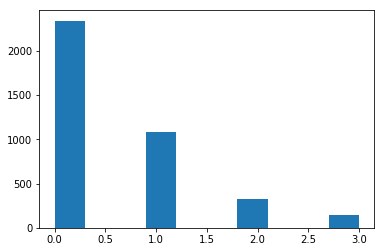

In [39]:
plt.hist(train_lab_1)

From the R code we have that V6 + V4 + V114 + V12 + V84 + V2 + V56 are the most important attributes. Note that in R we count from 1, so the indexes are wrong.

In [87]:
train_obs_0_rf = train_obs_0 
train_obs_1_rf = train_obs_1

In [88]:
train_obs_0_rf = train_obs_0_rf[:,[5, 3, 113, 11, 83, 1, 55]]
train_obs_1_rf = train_obs_1_rf[:,[5, 3, 113, 11, 83, 1, 55]]

In [89]:
train_obs_0_rf.shape

(3609, 7)

In [96]:
from sklearn.ensemble import RandomForestClassifier
clf0 = RandomForestClassifier(n_estimators=100, random_state=0)
clf1 = RandomForestClassifier(n_estimators=100, random_state=0)
clf0.fit(train_obs_0_rf, train_lab_0)
clf1.fit(train_obs_1_rf, train_lab_1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [97]:
sum(clf0.predict(obs_test[:,[5, 3, 113, 11, 83, 1, 55]]) == lab_test)

1741

In [98]:
sum(clf1.predict(obs_test[:,[5, 3, 113, 11, 83, 1, 55]]) == lab_test)

1741

We got the exact same answer. Strange. But not sure we need to do this part.